In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.impute import SimpleImputer


In [103]:
#Loading the dataset
data = pd.read_csv("mcdonalds_dataset.csv")
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [104]:
data1 = pd.read_csv("mcdonalds_dataset.csv")

In [105]:
#Exploring the dataset
data.columns.tolist()

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [106]:
data.shape

(1453, 15)

In [107]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [109]:
#Identifying Null Values
print(pd.isnull(data).sum())

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [110]:
#Segment extraction 

#Convert first 11 column entries in a binary matrix of 1 and 0
MD=data.iloc[:,0:11].replace("Yes",1).replace("No",0)
mean=round(MD.mean(),2)
mean

C:\Users\Pyari Phuppu\AppData\Local\Temp\ipykernel_20708\3643975543.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  MD=data.iloc[:,0:11].replace("Yes",1).replace("No",0)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [111]:
#Fit PCA
MD_pca = PCA()
MD_pca.fit(MD)

#Create a DataFrame for the PCA summary
pca_summary = pd.DataFrame({
    'Standard deviation': np.sqrt(MD_pca.explained_variance_),
    'Proportion of variance': MD_pca.explained_variance_ratio_,
    'Cumulative Proportion': np.cumsum(MD_pca.explained_variance_ratio_)
})

print(pca_summary)

    Standard deviation  Proportion of variance  Cumulative Proportion
0             0.757050                0.299447               0.299447
1             0.607456                0.192797               0.492244
2             0.504619                0.133045               0.625290
3             0.398799                0.083096               0.708386
4             0.337405                0.059481               0.767866
5             0.310275                0.050300               0.818166
6             0.289697                0.043849               0.862015
7             0.275122                0.039548               0.901563
8             0.265251                0.036761               0.938323
9             0.248842                0.032353               0.970677
10            0.236903                0.029323               1.000000


In [112]:
#Create the rotation matrix from the PCA components
rotation_matrix = pd.DataFrame(MD_pca.components_.T, index=MD.columns, columns=[f'PC{i+1}' for i in range(len(MD_pca.components_))])

#Round the rotation matrix to 3 decimal places
rotation_matrix = rotation_matrix.round(3)

print(rotation_matrix)

              PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
yummy      -0.477  0.364 -0.304  0.055 -0.308  0.171 -0.281  0.013  0.572   
convenient -0.155  0.016 -0.063 -0.142  0.278 -0.348 -0.060 -0.113 -0.018   
spicy      -0.006  0.019 -0.037  0.198  0.071 -0.355  0.708  0.376  0.400   
fattening   0.116 -0.034 -0.322 -0.354 -0.073 -0.407 -0.386  0.590 -0.161   
greasy      0.304 -0.064 -0.802  0.254  0.361  0.209  0.036 -0.138 -0.003   
fast       -0.108 -0.087 -0.065 -0.097  0.108 -0.595 -0.087 -0.628  0.166   
cheap      -0.337 -0.611 -0.149  0.119 -0.129 -0.103 -0.040  0.140  0.076   
tasty      -0.472  0.307 -0.287 -0.003 -0.211 -0.077  0.360 -0.073 -0.639   
expensive   0.329  0.601  0.024  0.068 -0.003 -0.261 -0.068  0.030  0.067   
healthy    -0.214  0.077  0.192  0.763  0.288 -0.178 -0.350  0.176 -0.186   
disgusting  0.375 -0.140 -0.089  0.370 -0.729 -0.211 -0.027 -0.167 -0.072   

             PC10   PC11  
yummy      -0.110  0.045  
convenient -0.666 -0.

   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   
3      1           1      0          1       1     1      1      1          0   
4      0           1      0          1       1     1      1      0          0   

   healthy  disgusting  Cluster  
0        0           0        2  
1        0           0        0  
2        1           0        0  
3        0           1        1  
4        1           0        2  


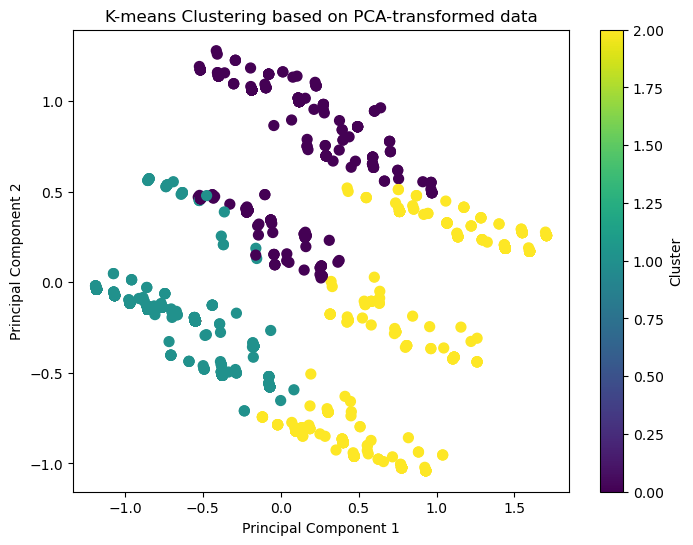

In [113]:
#Transform data using PCA
MD_pca_transformed = MD_pca.transform(MD)

#Choose number of clusters
n_clusters = 3

#Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(MD_pca_transformed)

#Assign the clusters to the original data
MD['Cluster'] = kmeans.labels_

print(MD.head())

#Plot the clusters (for first two PCA components)
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca_transformed[:, 0], MD_pca_transformed[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.title('K-means Clustering based on PCA-transformed data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

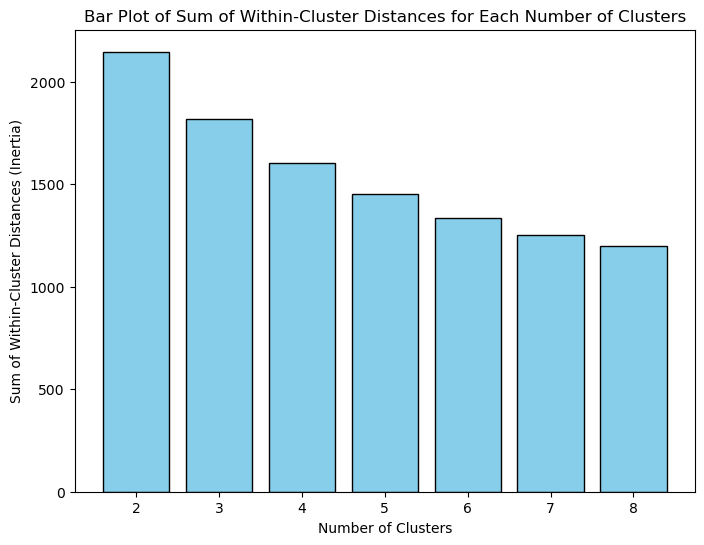

In [114]:
#Set a random seed for reproducibility
np.random.seed(1234)

#Range of clusters to test (from 2 to 8)
cluster_range = range(2, 9)
inertia_values = []  # To store inertia for each k

#Perform K-means clustering for each number of clusters
for k in cluster_range:
    #Fit the KMeans model with `n_clusters = k`
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)  #`n_init=10` for 10 different initializations
    kmeans.fit(MD_pca_transformed)
    inertia_values.append(kmeans.inertia_)

#Create a bar plot of inertia values
plt.figure(figsize=(8, 6))
plt.bar(cluster_range, inertia_values, color='skyblue', edgecolor='black')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Within-Cluster Distances (Inertia)')
plt.title('Bar Plot of Sum of Within-Cluster Distances for Each Number of Clusters')
plt.xticks(range(2, 9))
plt.show()

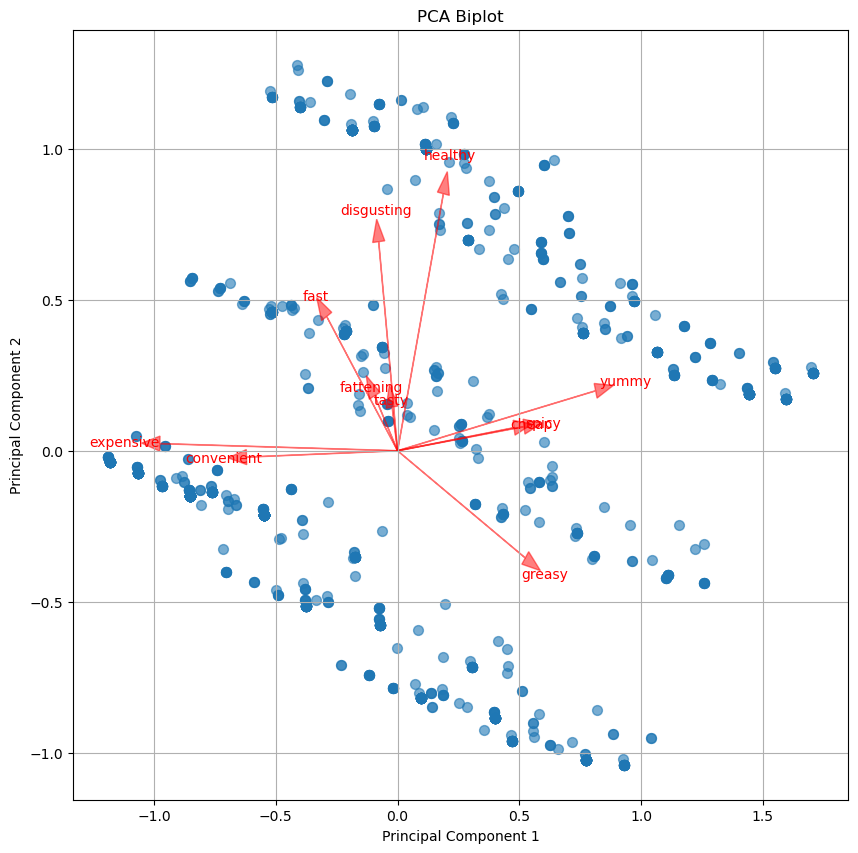

In [115]:
# Define the custom biplot function
def biplot(score, loadings, labels, var1=0, var2=1, show=True, dim=(10, 10)):
    plt.figure(figsize=dim)
    
    # Plot the PCA scores (data points)
    plt.scatter(score[:, var1], score[:, var2], s=50, alpha=0.6)
    
    # Add arrows for the loadings
    num_variables = loadings.shape[1]  # Number of original variables
    for i in range(num_variables):
        plt.arrow(0, 0, loadings[var1, i] * max(score[:, var1]), loadings[var2, i] * max(score[:, var2]), 
                  color='red', alpha=0.5, head_width=0.05)
        plt.text(loadings[var1, i] * max(score[:, var1]) * 1.15, 
                 loadings[var2, i] * max(score[:, var2]) * 1.15, 
                 labels[i], color='red', ha='center', va='center')
    
    # Add axis labels and title
    plt.xlabel(f'Principal Component {var1+1}')
    plt.ylabel(f'Principal Component {var2+1}')
    plt.title('PCA Biplot')
    plt.grid(True)
    
    if show:
        plt.show()

# Use the biplot function with your PCA data
biplot(score=MD_pca_transformed, 
       loadings=-MD_pca.components_.T,  # Apply negative sign to loadings if needed
       labels=MD.columns.values, 
       var1=0, var2=1,  # Ensure these are within the correct range
       show=True, dim=(10, 10))


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

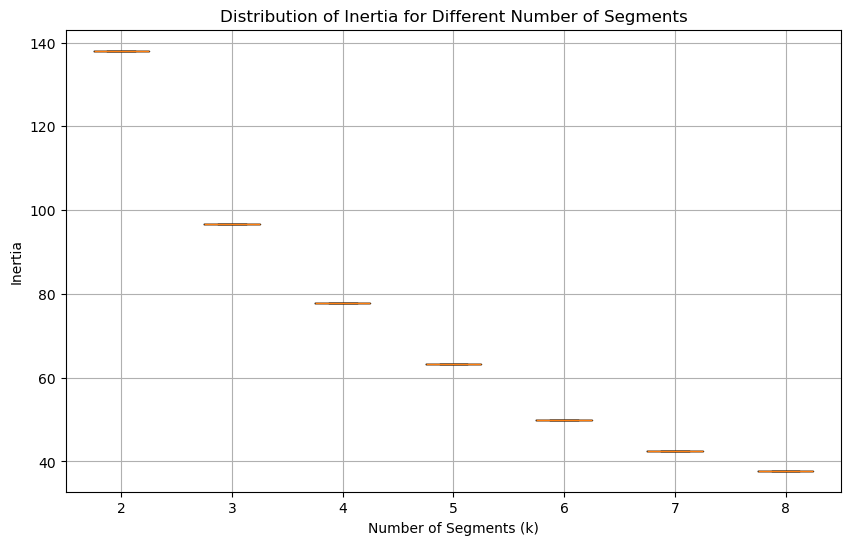

In [124]:
# Perform K-means clustering for k values from 2 to 8
n_clusters_range = range(2, 9)  # Number of clusters
inertia_values = {k: [] for k in n_clusters_range}

for k in n_clusters_range:
    kmeans_model = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans_model.fit(MD_pca_transformed)
    
    # Store Inertia values for each k
    inertia_values[k].append(kmeans_model.inertia_)

# Convert inertia values to a list for easier plotting
inertia_list = [inertia_values[k] for k in n_clusters_range]

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(inertia_list, labels=[str(k) for k in n_clusters_range])
plt.xlabel('Number of Segments (k)')
plt.ylabel('Inertia')
plt.title('Distribution of Inertia for Different Number of Segments')
plt.grid(True)
plt.show()


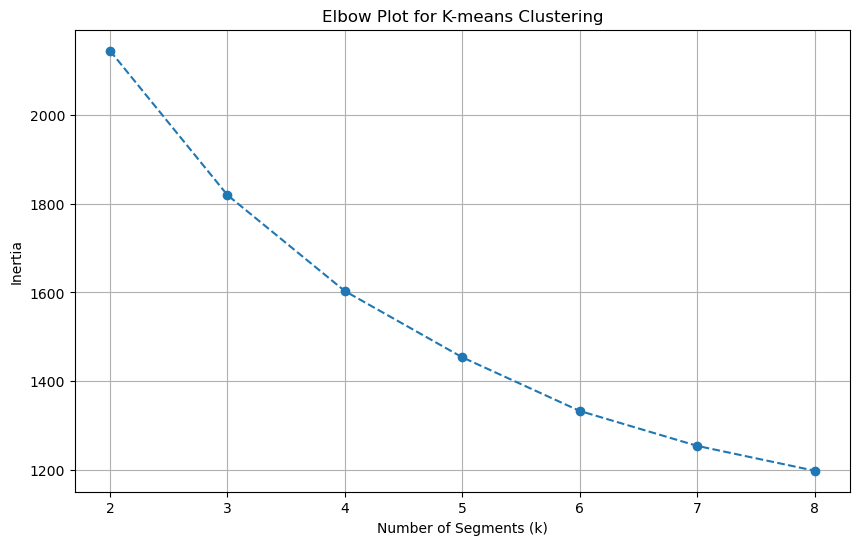

In [117]:
# Define the range for number of clusters
n_clusters_range = range(2, 9)  # Number of clusters from 2 to 8
inertia_values = []

# Perform K-means clustering for k values from 2 to 8
for k in n_clusters_range:
    kmeans_model = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans_model.fit(MD_pca_transformed)
    
    # Append the Inertia value for each k
    inertia_values.append(kmeans_model.inertia_)

# Create the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Segments (k)')
plt.ylabel('Inertia')
plt.title('Elbow Plot for K-means Clustering')
plt.grid(True)
plt.xticks(n_clusters_range)
plt.show()


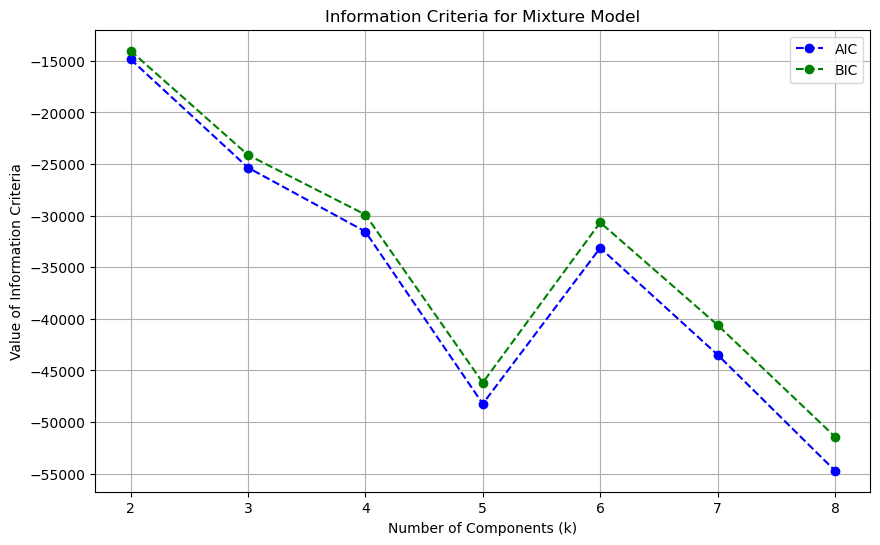

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Assuming MD_pca_transformed contains the PCA-transformed data
# Define the range of components to test
n_components_range = range(2, 9)

# Lists to store AIC and BIC values
aic_values = []
bic_values = []

# Fit GMM for each number of components and record AIC and BIC
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(MD_pca_transformed)
    
    # Record AIC and BIC values
    aic_values.append(gmm.aic(MD_pca_transformed))
    bic_values.append(gmm.bic(MD_pca_transformed))

# Plot the information criteria
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, aic_values, label='AIC', marker='o', linestyle='--', color='blue')
plt.plot(n_components_range, bic_values, label='BIC', marker='o', linestyle='--', color='green')
plt.xlabel('Number of Components (k)')
plt.ylabel('Value of Information Criteria')
plt.legend()
plt.title('Information Criteria for Mixture Model')
plt.grid(True)
plt.xticks(n_components_range)
plt.show()


In [119]:
# Create a sample DataFrame
np.random.seed(42)
n_samples = 100
MD = pd.DataFrame({
    'Feature1': np.random.normal(size=n_samples),
    'Feature2': np.random.normal(size=n_samples),
    'Feature3': np.random.normal(size=n_samples),
    'Like': np.random.choice(['Love', 'Hate'], size=n_samples)  # Categorical feature
})

# Fit PCA
pca = PCA(n_components=2)
MD_pca_transformed = pca.fit_transform(MD[['Feature1', 'Feature2', 'Feature3']])

# Perform K-means clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
MD['Cluster'] = kmeans.fit_predict(MD_pca_transformed)

# Define columns for clustering and categorical feature
cluster_col = 'Cluster'
feature_col = 'Like'


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Figure size 1000x800 with 0 Axes>

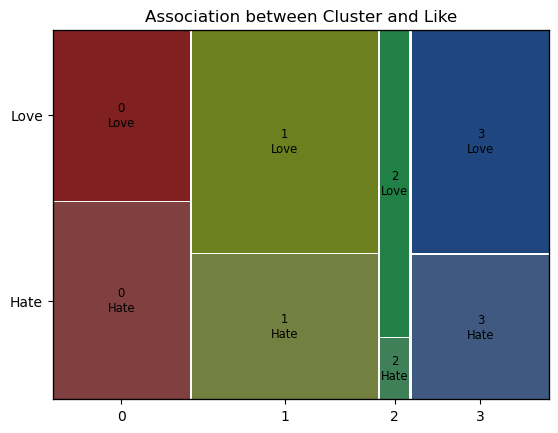

In [120]:
# Generate cross-tabulation
crosstab = pd.crosstab(MD[cluster_col], MD[feature_col])

# Create mosaic plot using statsmodels
plt.figure(figsize=(10, 8))
mosaic(crosstab.stack(), title=f'Association between {cluster_col} and {feature_col}')
plt.show()


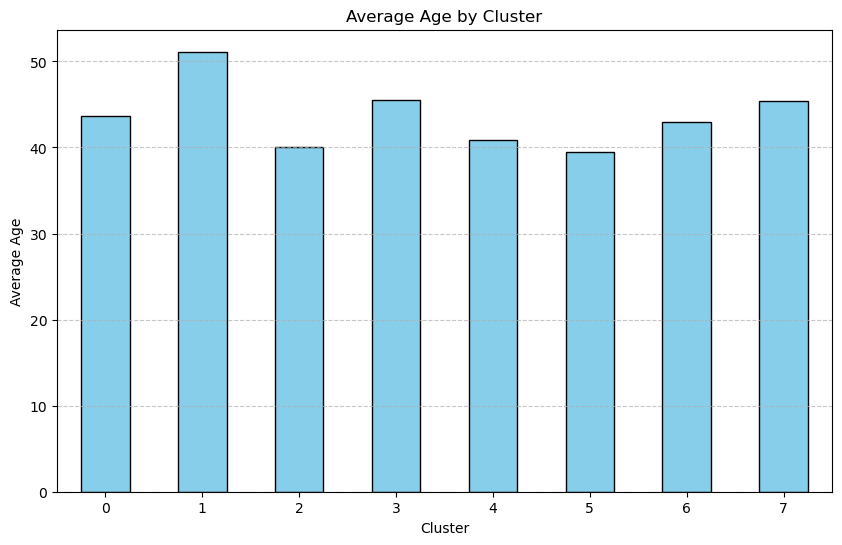

In [121]:
# Create a sample DataFrame
np.random.seed(42)
n_samples = 100
MD = pd.DataFrame({
    'Age': np.random.randint(18, 70, size=n_samples),
    'Cluster': np.random.choice([0, 1, 2, 3, 4, 5, 6, 7], size=n_samples)  # Cluster assignments
})

# Create a bar plot for the average age per cluster
age_by_cluster = MD.groupby('Cluster')['Age'].mean()

plt.figure(figsize=(10, 6))
age_by_cluster.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Age by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Age')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\Pyari Phuppu\AppData\Local\Temp\ipykernel_20708\1185243027.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Age', data=MD, palette='pastel')


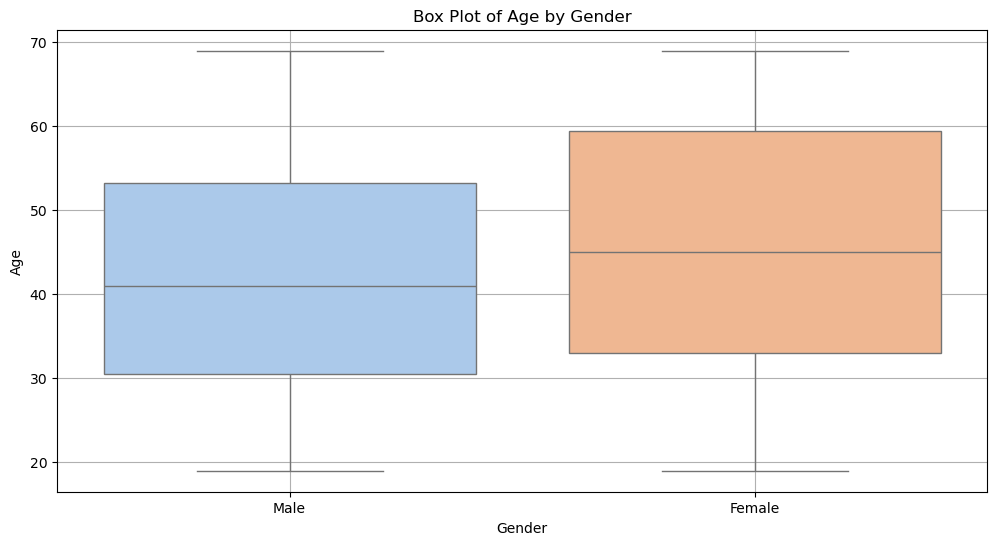

In [122]:
# Create a sample DataFrame with gender and age
np.random.seed(42)
n_samples = 100
MD = pd.DataFrame({
    'Age': np.random.randint(18, 70, size=n_samples),
    'Gender': np.random.choice(['Male', 'Female'], size=n_samples),  # Gender data
    'Cluster': np.random.choice([0, 1, 2, 3], size=n_samples)  # Cluster assignments
})

# Create a parallel box plot for age by gender
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Age', data=MD, palette='pastel')
plt.title('Box Plot of Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.grid(True)
plt.show()


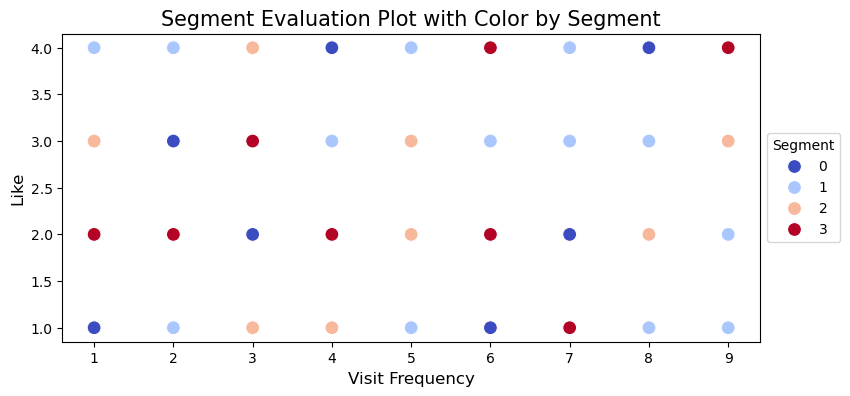

In [123]:
# Create a sample DataFrame
np.random.seed(42)
n_samples = 200
MD = pd.DataFrame({
    'VisitFrequency': np.random.randint(1, 10, size=n_samples),
    'Like': np.random.randint(1, 5, size=n_samples),
    'Cluster': np.random.choice([0, 1, 2, 3], size=n_samples)  # Cluster assignments
})

plt.figure(figsize=(9, 4))
sns.scatterplot(x="VisitFrequency", y="Like", data=MD, s=100, hue='Cluster', palette='coolwarm', legend='full')
plt.title("Segment Evaluation Plot with Color by Segment", fontsize=15)
plt.xlabel("Visit Frequency", fontsize=12)
plt.ylabel("Like", fontsize=12)
plt.legend(title='Segment', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

